# EDA

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
control_data = pd.read_csv("Z:\data\control_data.csv")

In [143]:
merge_data = pd.read_csv("Z:\data\merge.csv")

In [155]:
internal_env = pd.read_csv("Z:\data\internal_env_data.csv")

In [166]:
external_env = pd.read_csv("Z:\data\external_env_data.csv")

In [156]:
in_env = internal_env.copy()

In [167]:
ex_env = external_env.copy()

In [144]:
merge = merge_data.copy()

In [14]:
control = control_data.copy()

## 원시데이터 EDA실시

In [15]:
control['datetime'] = pd.to_datetime(control['datetime'], format='%Y-%m-%d %H:%M')
control.set_index('datetime', inplace=True)

In [158]:
in_env['datetime'] = pd.to_datetime(in_env['datetime'], format='%Y-%m-%d %H:%M')
in_env.set_index('datetime', inplace=True)

In [169]:
ex_env['datetime'] = pd.to_datetime(ex_env['datetime'], format='%Y-%m-%d %H:%M')
ex_env.set_index('datetime', inplace=True)

In [147]:

merge['datetime'] = pd.to_datetime(merge['datetime'], format='%Y-%m-%d %H:%M')
merge.set_index('datetime', inplace=True)

In [154]:
merge_cols = [
       'temperature', 'windSpeed', 'windDirection', 'humidity', 'solar',
       'groundTemp', 'innerCO2', 'innerHum', 'innerTemp', 'precipitation',
       'snowfall']

In [151]:
merge = merge[merge_cols]

In [16]:
control.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133598 entries, 2023-09-20 14:00:00 to 2024-04-18 23:59:00
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   upWinL01     133598 non-null  int64  
 1   upWinL02     133598 non-null  int64  
 2   upWinL03     133598 non-null  int64  
 3   upWin0L4     133598 non-null  int64  
 4   upWinR01     133598 non-null  int64  
 5   upWinR02     133598 non-null  int64  
 6   upWinR03     133598 non-null  int64  
 7   upWinR04     133598 non-null  int64  
 8   siWinL01     133598 non-null  int64  
 9   siWinL02     133598 non-null  int64  
 10  siWinL03     133598 non-null  int64  
 11  siWinL04     133598 non-null  int64  
 12  siWinR01     133598 non-null  int64  
 13  siWinR02     133598 non-null  int64  
 14  siWinR03     133598 non-null  int64  
 15  siWinR04     133598 non-null  int64  
 16  upCurt01     133598 non-null  int64  
 17  upCurt02     133598 non-null  int

In [139]:
win_col=['upWinL01', 'upWinL02', 'upWinL03', 'upWin0L4', 'upWinR01', 'upWinR02',
       'upWinR03', 'upWinR04', 'siWinL01', 'siWinL02', 'siWinL03', 'siWinL04' ]

In [29]:
cols = ['upCurt01', 'upCurt02',
       'upCurt03', 'upCurt04', 'dnCurt01', 'dnCurt02', 'dnCurt03', 'dnCurt04',
       'siCurt01', 'siCurt02', 'siCurt03', 'siCurt04']

In [30]:
curtain = control[cols]

In [140]:
wind = control[win_col]

In [102]:
curtain[curtain['siCurt04'] == 0].count()

upCurt01    133598
upCurt02    133598
upCurt03    133598
upCurt04    133598
dnCurt01    133598
dnCurt02    133598
dnCurt03    133598
dnCurt04    133598
siCurt01    133598
siCurt02    133598
siCurt03    133598
siCurt04    133598
dtype: int64

In [28]:
# curtain['Unnamed: 29'].isnull().sum()

np.int64(133538)

In [34]:
curtain.describe()

,upCurt01,upCurt02,upCurt03,upCurt04,dnCurt01,dnCurt02,dnCurt03,dnCurt04,siCurt01,siCurt02,siCurt03,siCurt04
count,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0,133598.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
wind.describe()

,upWinL01,upWinL02,upWinL03,upWin0L4,upWinR01,upWinR02,upWinR03,upWinR04,siWinL01,siWinL02,siWinL03,siWinL04,siWinR01,siWinR02,siWinR03,siWinR04
count,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.000000,133598.0,133598.0,133598.000000
mean,30.156657,23.588429,20.896480,17.036617,36.392274,28.552097,25.200430,19.932349,24.599987,18.788919,17.186402,14.736590,0.551655,0.0,0.0,10.255019
std,45.708771,42.309510,40.529666,37.538000,47.430085,44.550532,42.749962,39.592062,42.501244,38.669574,37.546039,35.428363,5.222895,0.0,0.0,20.188823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,100.000000,0.000000,0.000000,0.000000,100.000000,100.000000,75.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,0.0,0.0,50.000000


<Axes: xlabel='datetime'>

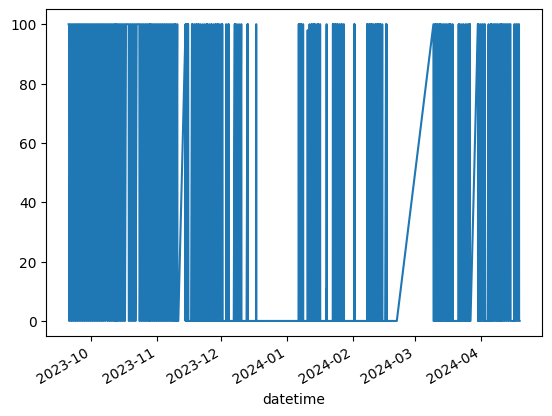

In [114]:
wind.upWinL01.plot()

<Axes: xlabel='datetime'>

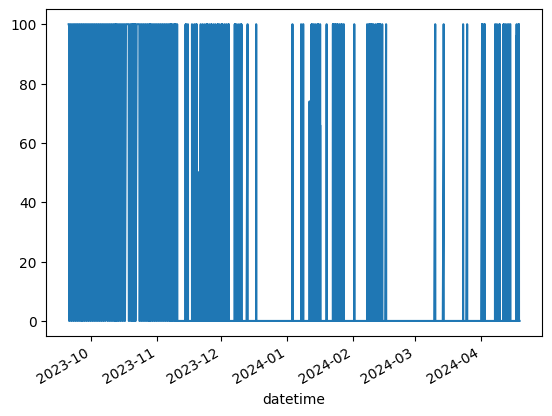

In [115]:
wind.upWinL02.plot()

<Axes: xlabel='datetime'>

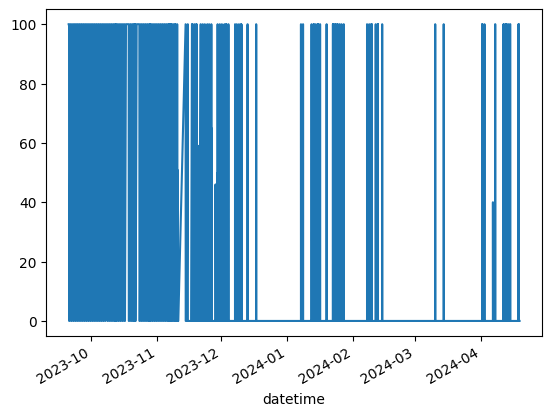

In [116]:
wind.upWinL03.plot()

<Axes: xlabel='datetime'>

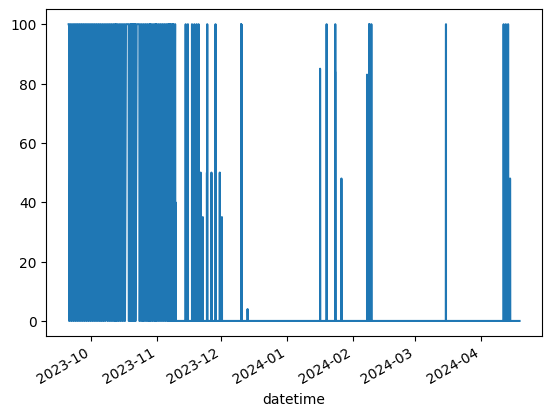

In [118]:
wind.upWin0L4.plot()

<Axes: xlabel='datetime'>

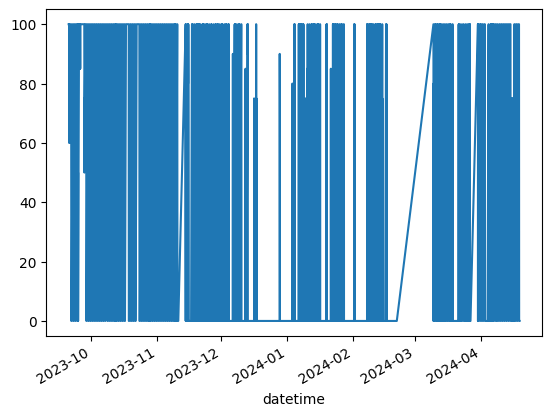

In [119]:
wind.upWinR01.plot()

<Axes: xlabel='datetime'>

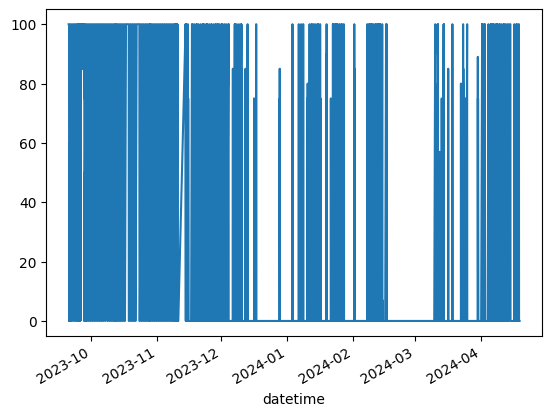

In [120]:
wind.upWinR02.plot()

<Axes: xlabel='datetime'>

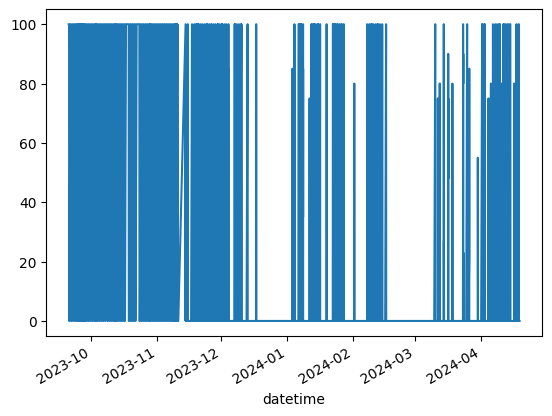

In [121]:
wind.upWinR03.plot()

<Axes: xlabel='datetime'>

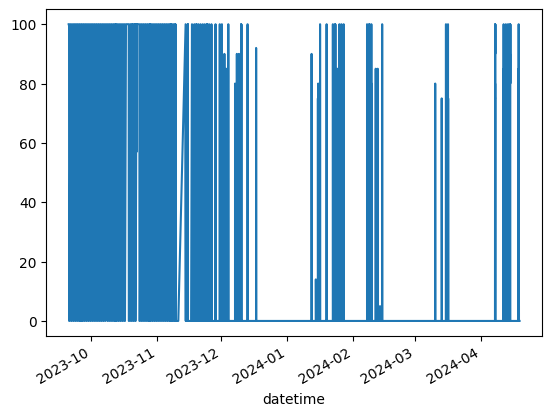

In [122]:
wind.upWinR04.plot()

<Axes: xlabel='datetime'>

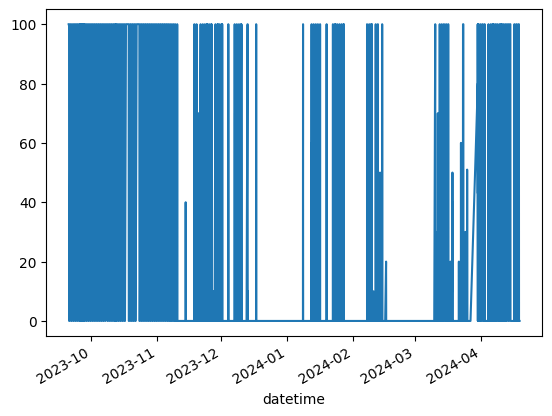

In [123]:
wind.siWinL01.plot()

<Axes: xlabel='datetime'>

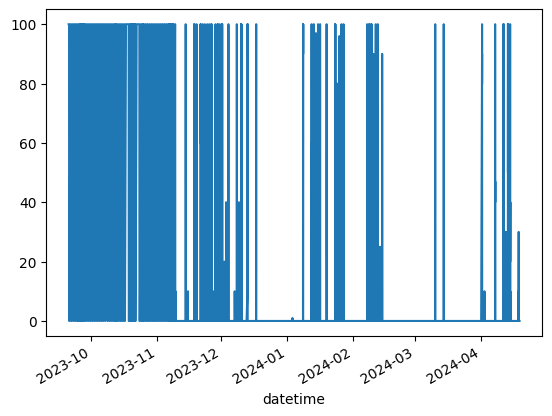

In [124]:
wind.siWinL02.plot()

<Axes: xlabel='datetime'>

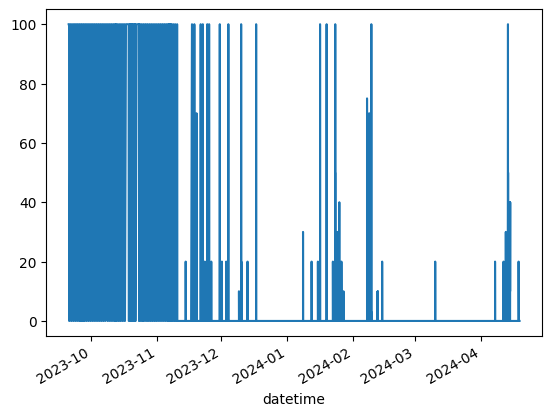

In [125]:
wind.siWinL03.plot()

<Axes: xlabel='datetime'>

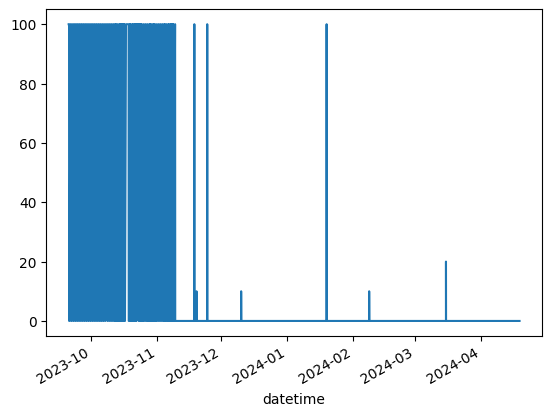

In [126]:
wind.siWinL04.plot()

<Axes: xlabel='datetime'>

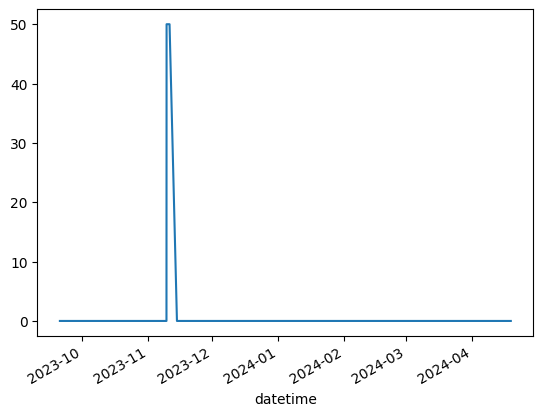

In [127]:
wind.siWinR01.plot()

<Axes: xlabel='datetime'>

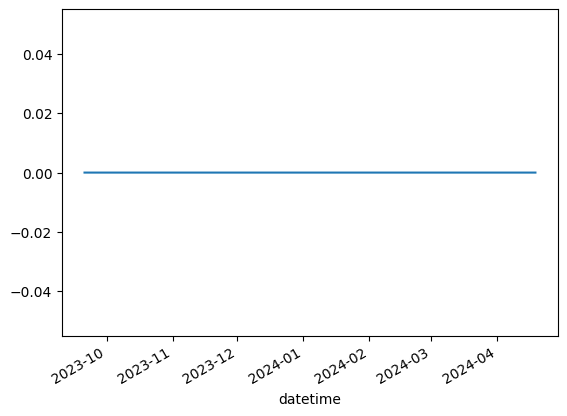

In [128]:
wind.siWinR02.plot()

<Axes: xlabel='datetime'>

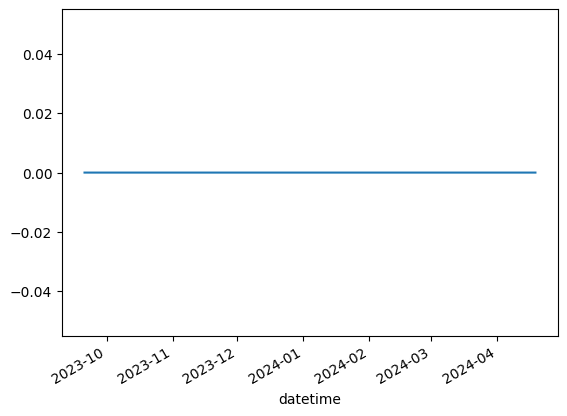

In [129]:
wind.siWinR03.plot()

<Axes: xlabel='datetime'>

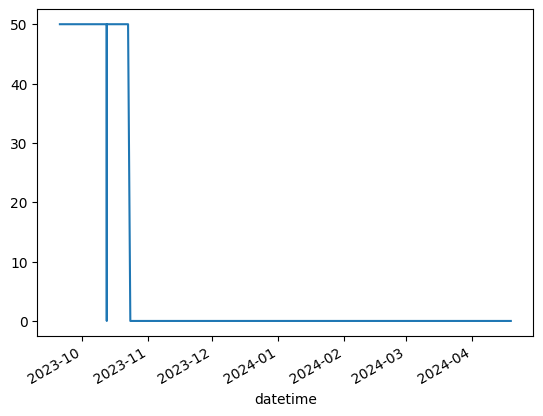

In [130]:
wind.siWinR04.plot()


In [42]:
curtain.columns

Index(['upCurt01', 'upCurt02', 'upCurt03', 'upCurt04', 'dnCurt01', 'dnCurt02',
       'dnCurt03', 'dnCurt04', 'siCurt01', 'siCurt02', 'siCurt03', 'siCurt04'],
      dtype='object')

In [55]:
upCurt01_1min = curtain.upCurt01.resample('1T').max()
upCurt02_1min = curtain.upCurt02.resample('1T').max()
upCurt03_1min = curtain.upCurt03.resample('1T').max()
upCurt04_1min = curtain.upCurt04.resample('1T').max()

dnCurt01_1min = curtain.dnCurt01.resample('1T').max()
dnCurt02_1min = curtain.dnCurt02.resample('1T').max()
dnCurt03_1min = curtain.dnCurt03.resample('1T').max()
dnCurt04_1min = curtain.dnCurt04.resample('1T').max()

siCurt01_1min = curtain.siCurt01.resample('1T').max()
siCurt02_1min = curtain.siCurt02.resample('1T').max()
siCurt03_1min = curtain.siCurt03.resample('1T').max()
siCurt04_1min = curtain.siCurt04.resample('1T').max()

C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\2729735299.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  upCurt01_1min = curtain.upCurt01.resample('1T').max()
C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\2729735299.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  upCurt02_1min = curtain.upCurt02.resample('1T').max()
C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\2729735299.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  upCurt03_1min = curtain.upCurt03.resample('1T').max()
C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\2729735299.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  upCurt04_1min = curtain.upCurt04.resample('1T').max()
C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\2729735299.py:6: FutureWarning: 'T' is

In [78]:
curtain_all = curtain.resample('1T').max()

C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\1016063076.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  curtain_all = curtain.resample('1T').max()


In [107]:
wind_all = wind.resample('1T').max()

C:\Users\spacefarm\AppData\Local\Temp\ipykernel_70716\769833904.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  wind_all = wind.resample('1T').max()


In [109]:
wind_all.shape

(304440, 16)

In [83]:
curtain_all.shape

(304440, 12)

In [110]:
wind_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304440 entries, 2023-09-20 14:00:00 to 2024-04-18 23:59:00
Freq: min
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   upWinL01  130441 non-null  float64
 1   upWinL02  130441 non-null  float64
 2   upWinL03  130441 non-null  float64
 3   upWin0L4  130441 non-null  float64
 4   upWinR01  130441 non-null  float64
 5   upWinR02  130441 non-null  float64
 6   upWinR03  130441 non-null  float64
 7   upWinR04  130441 non-null  float64
 8   siWinL01  130441 non-null  float64
 9   siWinL02  130441 non-null  float64
 10  siWinL03  130441 non-null  float64
 11  siWinL04  130441 non-null  float64
 12  siWinR01  130441 non-null  float64
 13  siWinR02  130441 non-null  float64
 14  siWinR03  130441 non-null  float64
 15  siWinR04  130441 non-null  float64
dtypes: float64(16)
memory usage: 39.5 MB


In [84]:
curtain_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304440 entries, 2023-09-20 14:00:00 to 2024-04-18 23:59:00
Freq: min
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   upCurt01  130441 non-null  float64
 1   upCurt02  130441 non-null  float64
 2   upCurt03  130441 non-null  float64
 3   upCurt04  130441 non-null  float64
 4   dnCurt01  130441 non-null  float64
 5   dnCurt02  130441 non-null  float64
 6   dnCurt03  130441 non-null  float64
 7   dnCurt04  130441 non-null  float64
 8   siCurt01  130441 non-null  float64
 9   siCurt02  130441 non-null  float64
 10  siCurt03  130441 non-null  float64
 11  siCurt04  130441 non-null  float64
dtypes: float64(12)
memory usage: 30.2 MB


In [111]:
wind_all.isnull().sum()

upWinL01    173999
upWinL02    173999
upWinL03    173999
upWin0L4    173999
upWinR01    173999
upWinR02    173999
upWinR03    173999
upWinR04    173999
siWinL01    173999
siWinL02    173999
siWinL03    173999
siWinL04    173999
siWinR01    173999
siWinR02    173999
siWinR03    173999
siWinR04    173999
dtype: int64

In [112]:
wind_all.isnull().sum() / wind_all.shape[0] * 100 # 전체 57% 결측치 

upWinL01    57.153791
upWinL02    57.153791
upWinL03    57.153791
upWin0L4    57.153791
upWinR01    57.153791
upWinR02    57.153791
upWinR03    57.153791
upWinR04    57.153791
siWinL01    57.153791
siWinL02    57.153791
siWinL03    57.153791
siWinL04    57.153791
siWinR01    57.153791
siWinR02    57.153791
siWinR03    57.153791
siWinR04    57.153791
dtype: float64

In [85]:
curtain_all.isnull().sum()

upCurt01    173999
upCurt02    173999
upCurt03    173999
upCurt04    173999
dnCurt01    173999
dnCurt02    173999
dnCurt03    173999
dnCurt04    173999
siCurt01    173999
siCurt02    173999
siCurt03    173999
siCurt04    173999
dtype: int64

In [82]:
curtain_all.isnull().sum() / curtain_all.shape[0] * 100 # 전체 57% 결측치 

upCurt01    57.153791
upCurt02    57.153791
upCurt03    57.153791
upCurt04    57.153791
dnCurt01    57.153791
dnCurt02    57.153791
dnCurt03    57.153791
dnCurt04    57.153791
siCurt01    57.153791
siCurt02    57.153791
siCurt03    57.153791
siCurt04    57.153791
dtype: float64

In [75]:
upCurt01_1min = curtain.upCurt01.resample('1T').max()
upCurt02_1min = curtain.upCurt02.resample('1T').max()
upCurt03_1min = curtain.upCurt03.resample('1T').max()
upCurt04_1min = curtain.upCurt04.resample('1T').max()

dnCurt01_1min = curtain.dnCurt01.resample('1T').max()
dnCurt02_1min = curtain.dnCurt02.resample('1T').max()
dnCurt03_1min = curtain.dnCurt03.resample('1T').max()
dnCurt04_1min = curtain.dnCurt04.resample('1T').max()

siCurt01_1min = curtain.siCurt01.resample('1T').max()
siCurt02_1min = curtain.siCurt02.resample('1T').max()
siCurt03_1min = curtain.siCurt03.resample('1T').max()
siCurt04_1min = curtain.siCurt04.resample('1T').max()

304440

<Axes: xlabel='datetime'>

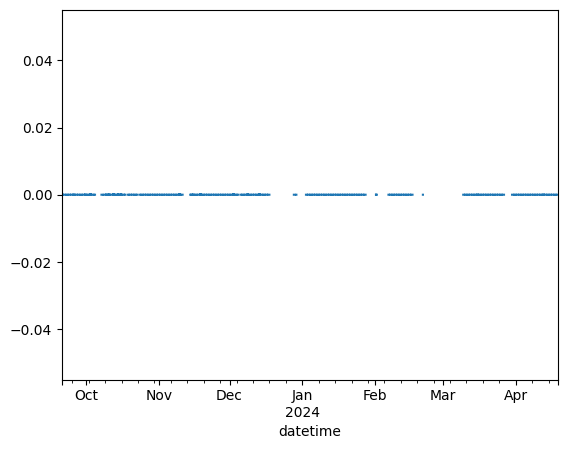

In [62]:
dnCurt01_1min.plot()

<Axes: xlabel='datetime'>

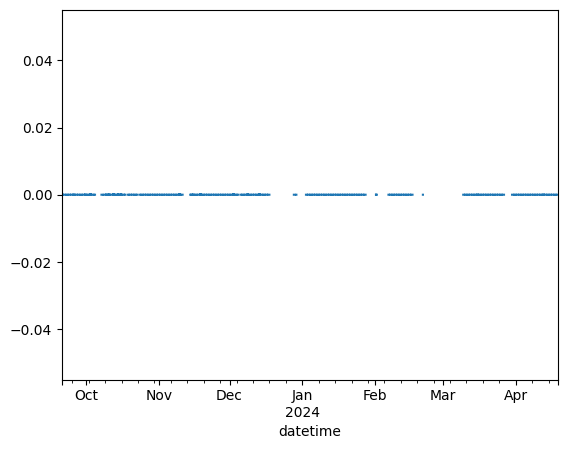

In [63]:
dnCurt02_1min.plot()

<Axes: xlabel='datetime'>

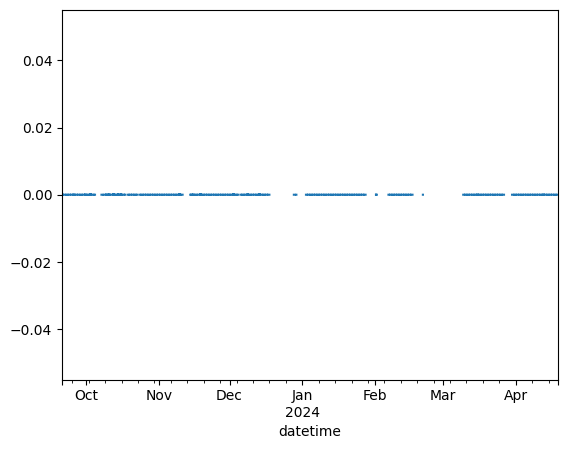

In [64]:
dnCurt03_1min.plot()

<Axes: xlabel='datetime'>

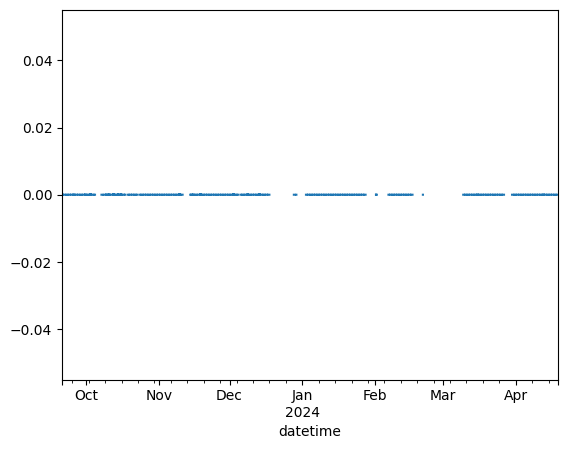

In [65]:
dnCurt04_1min.plot()

<Axes: xlabel='datetime'>

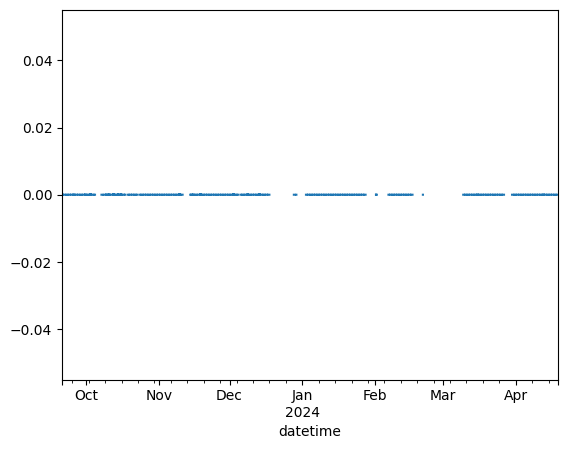

In [66]:
siCurt01_1min.plot()

<Axes: xlabel='datetime'>

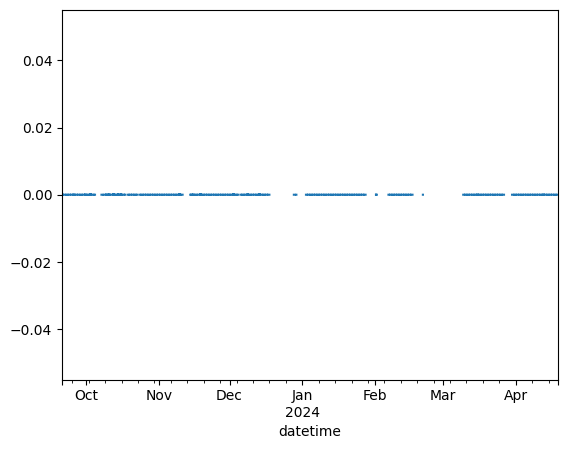

In [67]:
siCurt02_1min.plot()

<Axes: xlabel='datetime'>

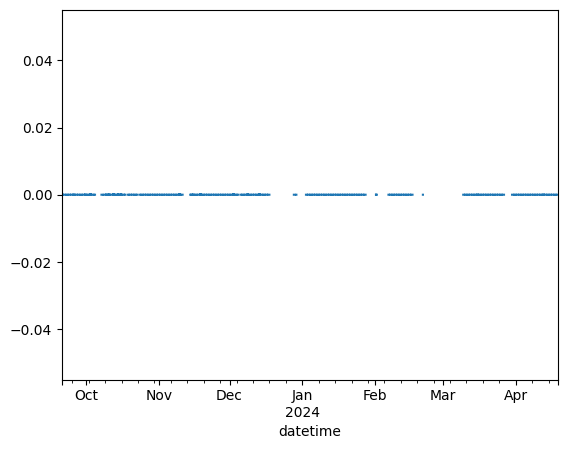

In [68]:
siCurt03_1min.plot() 

<Axes: xlabel='datetime'>

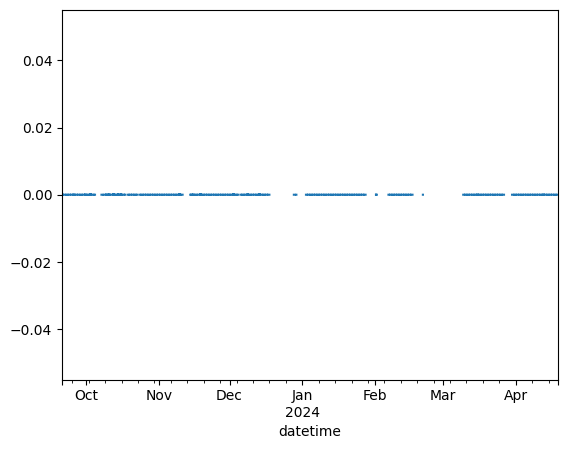

In [69]:
siCurt04_1min.plot() 

### 각 원시데이터별 기초 통계치

In [ ]:
# 전체 건수 : 133,598개
# 시작일 : 2023-09-20 14:00:00
# 종료일 : 2024-04-18 23:59:00

### 결측치에 대한 통계치

In [ ]:
# 커튼 전체 건수 : 304440 개 (1분단위로 데이터 기본단위 변경시)
# 커튼 결측치 : 173999 개
# 결측치 비율: 57%

### 이상치에 대한 통계치

### 변수 시각화

### 변수 상관관계분석

In [ ]:
# heatmap  코드 준비

In [138]:
wind.columns

Index(['upWinL01', 'upWinL02', 'upWinL03', 'upWin0L4', 'upWinR01', 'upWinR02',
       'upWinR03', 'upWinR04', 'siWinL01', 'siWinL02', 'siWinL03', 'siWinL04',
       'siWinR01', 'siWinR02', 'siWinR03', 'siWinR04'],
      dtype='object')

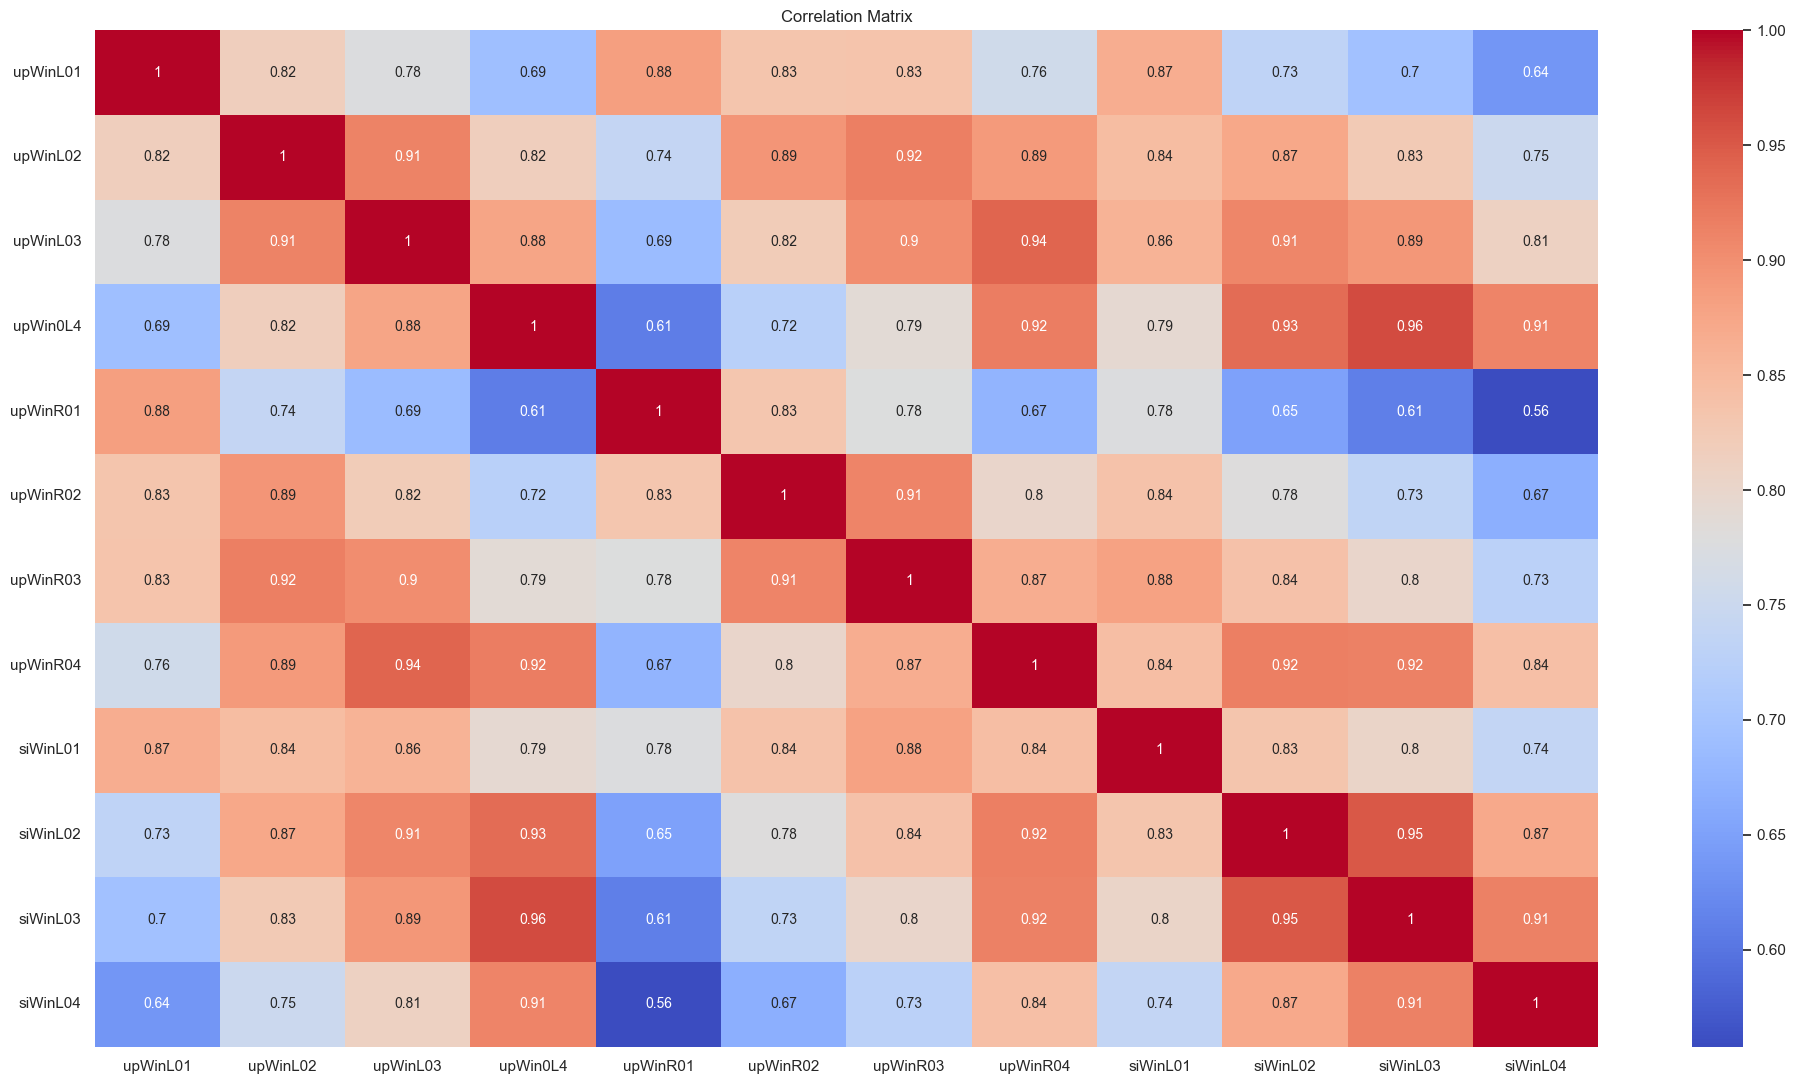

In [164]:
# 창 raw 데이터 - siwinR01~04 제외
corr_matrix = wind.corr()

plt.figure(figsize=(20, 11))   # Set specific size for this plot
sns.set(rc={'figure.figsize':(12,8)})  # Set default size for future plots
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Increased annotation font size
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

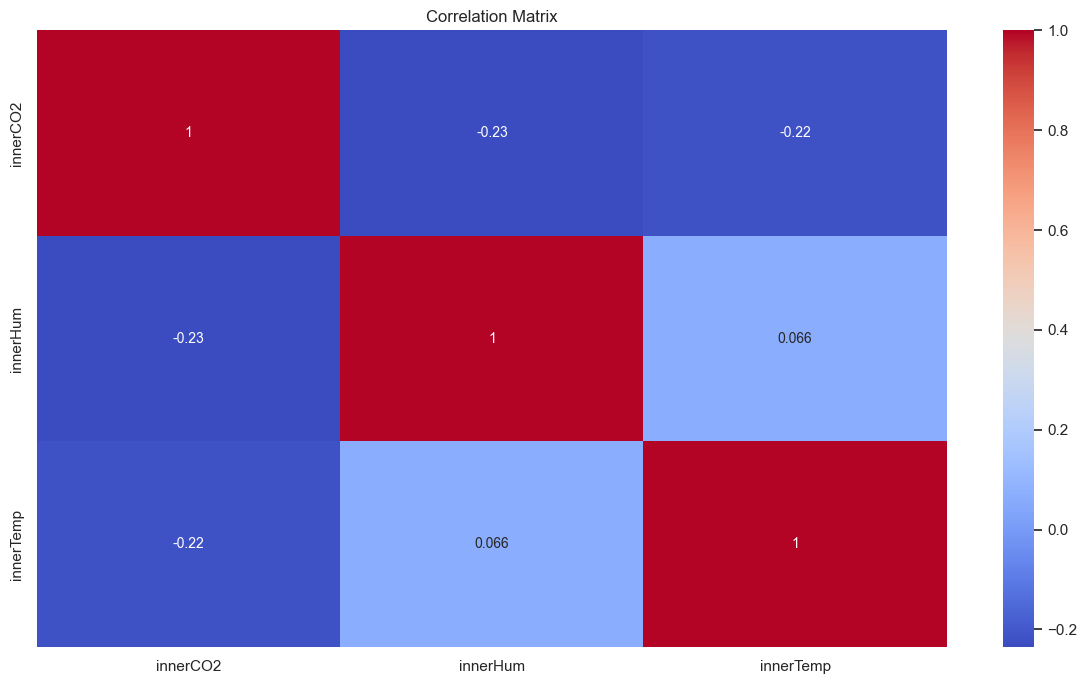

In [171]:
# 내부환경 raw data 
corr_matrix = in_env.corr()

plt.figure(figsize=(12, 7))   # Set specific size for this plot
sns.set(rc={'figure.figsize':(12,8)})  # Set default size for future plots
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Increased annotation font size
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

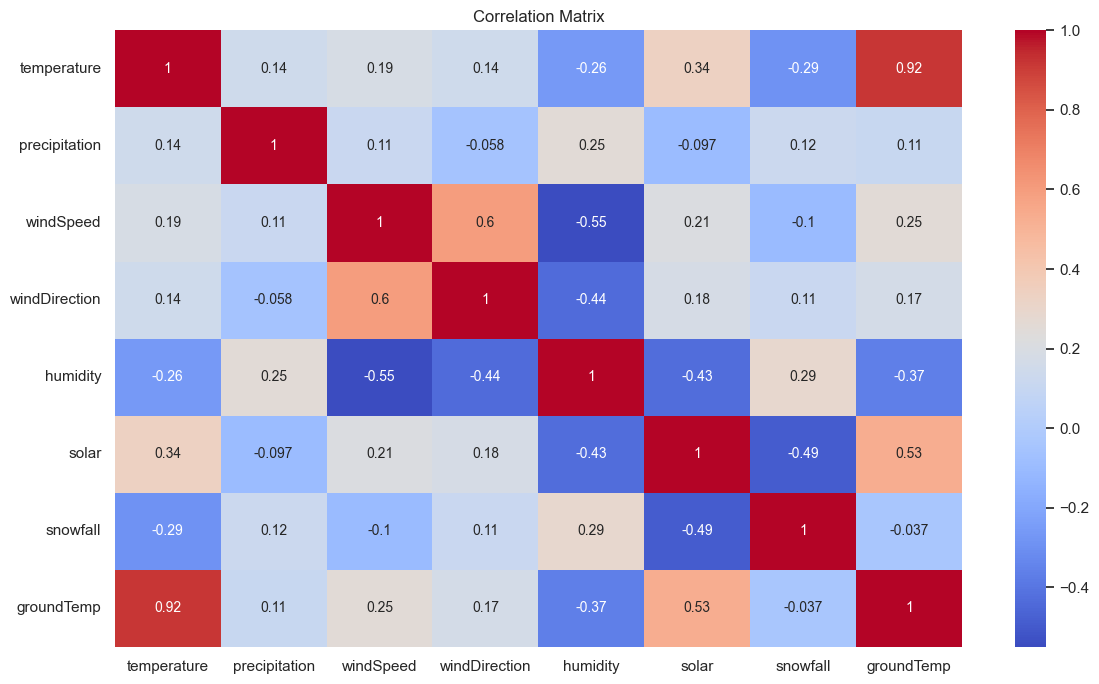

In [172]:
# 외부환경 raw data 
corr_matrix = ex_env.corr()

plt.figure(figsize=(12, 7))   # Set specific size for this plot
sns.set(rc={'figure.figsize':(12,8)})  # Set default size for future plots
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Increased annotation font size
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

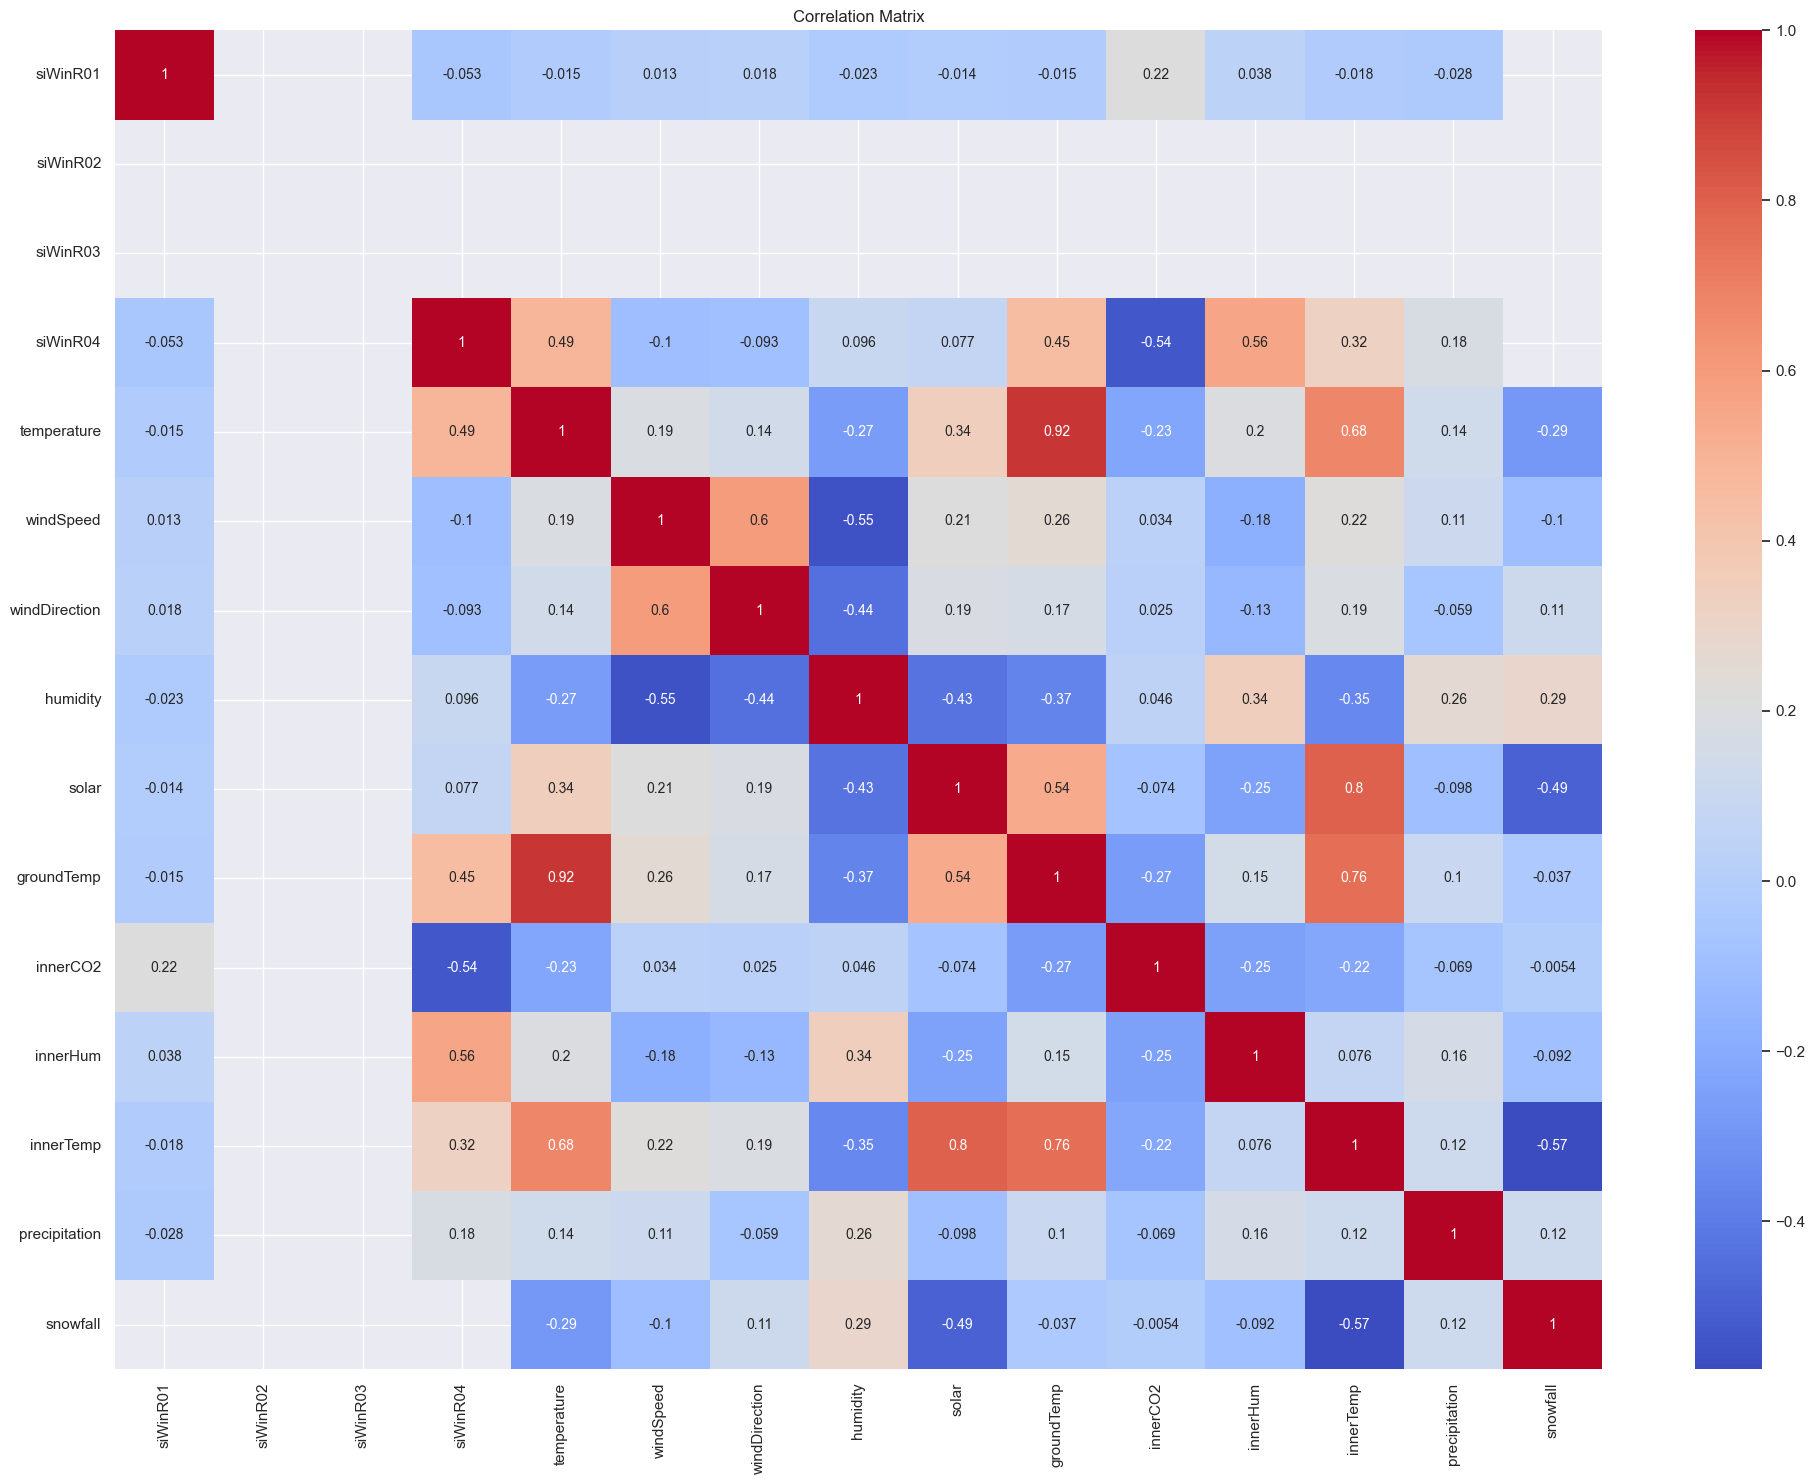

In [153]:

# merge 된 데이터 히트맵
corr_matrix = merge.corr()
plt.figure(figsize=(20, 15))   # Set specific size for this plot
sns.set(rc={'figure.figsize':(12,8)})  # Set default size for future plots
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})  # Increased annotation font size
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [136]:

corr_matrix = wind.corr()

# 타겟 열과 다른 피처들 간의 상관관계를 추출
target_corr = corr_matrix['innerSolar']

# 타겟과의 상관계수를 내림차순으로 정렬
target_corr_sorted = target_corr.sort_values(ascending=False)

# 결과를 데이터프레임으로 변환
df_temp = pd.DataFrame(target_corr_sorted, columns=['innerSolar'])

# 히트맵 시각화
plt.figure(figsize=(10, 8))  # 그림 크기 설정
sns.heatmap(df_temp, annot=True, cmap='viridis', center=0, vmin=-1, vmax=1, fmt='.2f')
plt.title('TARGET HEAT MAP')
plt.show()

KeyError: 'innerSolar'